# 1- Preprocessing 

In [99]:
# Importing Libraries
import pandas as pd
import matplotlib as mp
import seaborn as sb

In [100]:
data = pd.read_csv("titanic-passengers.csv", sep=";")
new_data = data

# Displaying the first five rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [101]:
# concise summary of a DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [102]:
# Showing descriptive statistics
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Collander, Mr. Erik Gustaf",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [103]:
# Changing survived and Sex columns from categorical to numerical
# for survived: yes = 1, no = 0
# for Sex: male = 1, female = 0
new_data["Survived"] = data["Survived"].replace({"Yes":1, "No":0}, inplace=False)
new_data["Sex"] = data["Sex"].replace({"male":1, "female":0}, inplace=False)

# One-hot-Encoding the Embarked column
new_data = pd.get_dummies(new_data, columns=["Embarked"])
pd.concat([new_data, dummies], axis=1)
# new_data.drop(["Embarked"], axis=1)
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0,0,1


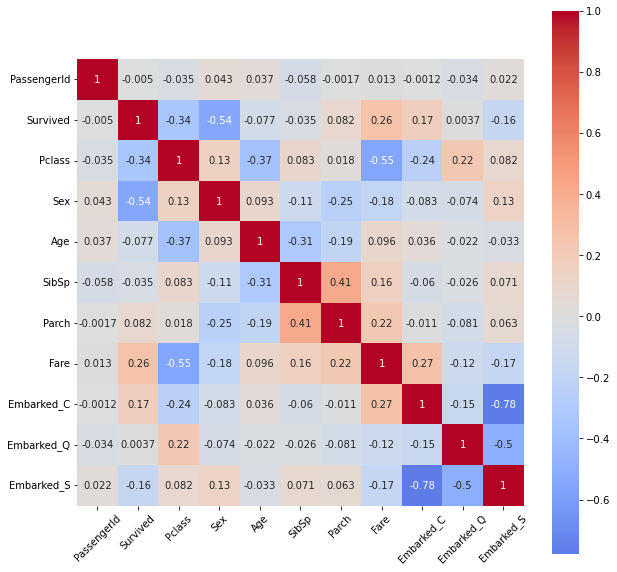

In [120]:
# Finding correlations between features and outcome
data_corr = new_data.corr()
mp.pyplot.subplots(figsize=(10, 10))
dataplot = sb.heatmap(data_corr, annot=True, cmap="coolwarm", center=0, square=True)
mp.pyplot.xticks(rotation = 45)
mp.pyplot.show()

In [121]:
# Finding missing values
new_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [130]:
# Removed all columns with NaN values due to their importance
new_data.dropna(how="any", axis=1, inplace=True)

new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,1,0,F.C. 12750,52.0000,0,0,1
